![A/B Testing Result](images/ab_testing.png)

# A/B Testing & Experimentation 


## Latar Belakang
Perusahaan ingin meningkatkan performa bisnis pada produk berbasis langganan dengan mengoptimalkan proses trial dan konversi ke pelanggan berbayar. Untuk itu, dilakukan eksperimen A/B testing pada dua variant (A dan B) guna mengetahui apakah perubahan yang diterapkan pada variant B dapat meningkatkan jumlah trial start, conversion rate dari trial ke paid, serta revenue dalam 30 hari.

## Tujuan
1. Mengetahui apakah variant B dapat meningkatkan jumlah pengguna yang memulai trial dibandingkan variant A.
2. Mengukur apakah variant B mampu meningkatkan conversion rate dari trial ke paid user.
3. Membandingkan total dan rata-rata revenue 30 hari antara variant A dan B.

## Hipotesis
- **H0 (Hipotesis Nol):** Tidak terdapat perbedaan signifikan antara variant A dan B terhadap jumlah trial start, conversion rate, dan revenue 30 hari.
- **H1 (Hipotesis Alternatif):** Variant B memberikan peningkatan signifikan pada jumlah trial start, conversion rate, dan revenue 30 hari dibandingkan variant A.

## Metrik yang Digunakan
1. **Jumlah Trial Start:** Banyaknya user yang memulai trial pada masing-masing variant.
2. **Conversion Rate Trial → Paid:** Persentase user yang memulai trial dan kemudian menjadi pelanggan berbayar.
3. **Revenue 30 Hari:** Total dan rata-rata pendapatan yang dihasilkan dalam 30 hari pertama setelah trial.

## Metodologi
- Data difilter untuk hanya menggunakan user yang memulai trial pada periode eksperimen.
- Analisis dilakukan dengan visualisasi (barplot, histogram) dan uji statistik (Shapiro-Wilk, Levene, Mann-Whitney) untuk membandingkan performa kedua variant.
- Uplift absolut dan persentase dihitung untuk mengukur besarnya peningkatan pada variant B.

## Import library


In [13]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Read data

In [30]:
df = pd.read_csv("C:\Mini Proyek\AB Testing campaign\Dataset\Ab_testing (1).csv")
df.head(10)

,period,cohort_date,variant,user_id,country,platform,traffic_source,device_model,age,sessions_7d,time_to_first_action_min,trial_start,paid_subscriber,revenue_30d
0,during,2025-07-05,B,APP201334,ID,android,organic,low_end,54,4,6.1,0,0,444.616527
1,during,2025-07-04,A,APP201596,ID,android,organic,low_end,24,2,6.5,0,0,424.835708
2,during,2025-07-06,A,APP200545,TH,android,organic,mid_range,41,4,7.3,0,0,393.086785
3,during,2025-07-07,B,APP203155,MY,android,organic,mid_range,40,1,2.3,0,0,502.190971
4,during,2025-07-04,A,APP202354,ID,android,paid,mid_range,49,6,2.4,1,0,432.384427
5,during,2025-07-09,A,APP203378,IN,android,organic,mid_range,20,1,4.7,0,0,476.151493
6,during,2025-07-09,B,APP203084,ID,android,organic,mid_range,52,6,2.7,0,0,518.731703
7,during,2025-07-15,B,APP207518,ID,android,paid,mid_range,32,4,3.7,0,0,433.653476
8,during,2025-07-05,B,APP207944,TH,ios,paid,mid_range,49,7,8.7,0,0,477.023732
9,during,2025-07-04,B,APP206023,ID,android,organic,low_end,17,7,4.4,1,0,317.936633


## Data Preparation
Pada bagian ini, data difilter untuk mendapatkan subset yang relevan untuk analisis A/B testing. Hanya data dengan trial_start = 1 dan period = 'during' yang digunakan, sehingga analisis benar-benar membandingkan pengguna yang memulai trial pada periode eksperimen untuk masing-masing variant.
Tujuan data preparation adalah memastikan data yang dianalisis sesuai dengan kriteria eksperimen, sehingga hasil analisis dan uji statistik benar-benar merepresentasikan dampak dari masing-masing variant terhadap trial start dan revenue selama periode eksperimen.

In [15]:
aov_A = df[(df['variant']=='A') & (df['trial_start'] == 1) & (df['period'] == 'during')]
aov_B = df[(df['variant']=='B') & (df['trial_start'] == 1) & (df['period'] == 'during')]

In [16]:
aov_B.shape[0]

42

## Cek Normality

In [17]:
# Cek Normality
# Uji Shapiro-Wilk digunakan untuk mengecek apakah distribusi revenue_30d pada masing-masing variant normal atau tidak.
shapiro_A = stats.shapiro(aov_A['revenue_30d'])
shapiro_B = stats.shapiro(aov_B['revenue_30d'])

print("If p-value < 0.05 tidak terdistribusi normal\n")

print("Shapiro-Wilk test for Variant A: p-value={:.2f}".format(shapiro_A.pvalue))
print("Shapiro-Wilk test for Variant B: p-value={:.2f}".format(shapiro_B.pvalue))

If p-value < 0.05 tidak terdistribusi normal

Shapiro-Wilk test for Variant A: p-value=0.06
Shapiro-Wilk test for Variant B: p-value=0.49


## Cek Variasi

In [18]:
# Cek Variasi
# Uji Levene digunakan untuk mengecek apakah variansi revenue_30d antara variant A dan B homogen (equal variance) atau tidak.
cek_variansi = stats.levene(aov_A['revenue_30d'], aov_B['revenue_30d'])

print("If p-value < 0.05 tidak homogen (equal variance)")

print("Nilai p-value: {:.2f}".format(cek_variansi.pvalue))

If p-value < 0.05 tidak homogen (equal variance)
Nilai p-value: 0.92


## Uji Statistik
- H0: varian A dan varian B tidak ada bedanya terhadap order value.
- H1: Varian B mampu meningkatkan order value dibanding varian A

In [19]:
# Uji Statistik
# Uji Mann-Whitney digunakan untuk mengetahui apakah terdapat perbedaan signifikan antara revenue_30d variant A dan B.
whitney = stats.mannwhitneyu(aov_A['revenue_30d'], aov_B['revenue_30d'])

if whitney.pvalue < 0.05:
  print("Reject H0")
else:
  print("Accept H0")

print("Nilai p-value: {:.2f}".format(whitney.pvalue))

Reject H0
Nilai p-value: 0.00


## Uji Kenaikan Bisnis

In [20]:
# Uji Kenaikan Bisnis
# Menghitung rata-rata revenue_30d masing-masing variant dan selisihnya untuk melihat potensi kenaikan bisnis.
mean_A = aov_A['revenue_30d'].mean()
mean_B = aov_B['revenue_30d'].mean()

diff = mean_B - mean_A

print('Rata-rata variant A: {:.2f} dan variant B: {:.2f}'.format(mean_A, mean_B))
print("Perbedaan antara kedua variant: {:.2f}".format(diff))

Rata-rata variant A: 406.05 dan variant B: 486.88
Perbedaan antara kedua variant: 80.83


In [21]:
# Menghitung uplift absolut dan persentase dari rata-rata revenue_30d antara variant B dan A.
mean_A = aov_A['revenue_30d'].mean()
mean_B = aov_B['revenue_30d'].mean()

uplift_abs = (mean_B - mean_A)
uplift_perc = round((mean_B - mean_A)/mean_A*100,2)

print("Uplift Absolut; ", uplift_abs)
print("Uplift Percent; {}%".format(uplift_perc))

Uplift Absolut;  80.83226887231848
Uplift Percent; 19.91%


Key insight : variant B menghasilkan mean revenue 80.83 lebih tinggi dari A, atau +19.91% lebih besar.

In [22]:
# Menghitung median revenue_30d masing-masing variant dan selisihnya untuk melihat potensi kenaikan bisnis berdasarkan median.
median_A = aov_A['revenue_30d'].median()
median_B = aov_B['revenue_30d'].median()

diff = median_B - median_A

print('Rata-rata variant A: {:.2f} dan variant B: {:.2f}'.format(median_A, median_B))
print("Perbedaan antara kedua variant: {:.2f}".format(diff))

Rata-rata variant A: 404.47 dan variant B: 480.78
Perbedaan antara kedua variant: 76.31


In [23]:
# Menghitung uplift absolut dan persentase dari median revenue_30d antara variant B dan A.
median_A = aov_A['revenue_30d'].median()
median_B = aov_B['revenue_30d'].median()

uplift_abs = (median_B - median_A)
uplift_perc = round((median_B - median_A)/median_A*100,2)

print("Uplift Absolut; ", uplift_abs)
print("Uplift Percent; {}%".format(uplift_perc))

Uplift Absolut;  76.31072644696678
Uplift Percent; 18.87%


Key insight : variant B menghasilkan median revenue 76.31 lebih tinggi dari A, atau +18.87% lebih besar.

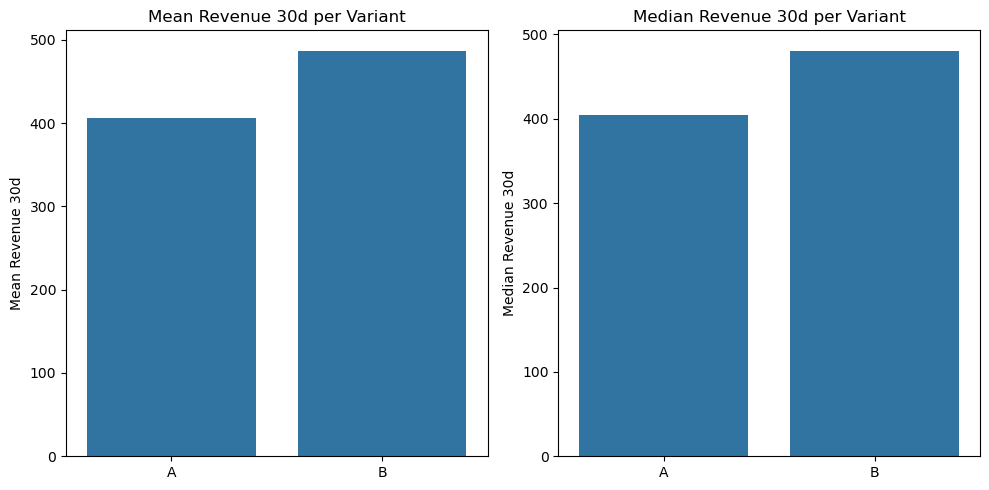

In [39]:
# Visualisasi rata-rata revenue_30d per variant
mean_values = [mean_A, mean_B]
median_values = [median_A, median_B]
variants = ['A', 'B']

plt.figure(figsize=(10,5))

# Barplot mean
plt.subplot(1,2,1)
sns.barplot(x=variants, y=mean_values)
plt.title('Mean Revenue 30d per Variant')
plt.ylabel('Mean Revenue 30d')

# Barplot median
plt.subplot(1,2,2)
sns.barplot(x=variants, y=median_values)
plt.title('Median Revenue 30d per Variant')
plt.ylabel('Median Revenue 30d')

plt.tight_layout()
plt.show()

## Kesimpulan
Variant B menunjukkan peningkatan pada metrik-metrik utama dibandingkan variant A, baik dari sisi jumlah trial start, conversion rate, maupun revenue 30 hari. Hasil uji statistik mendukung bahwa perbedaan tersebut signifikan, sehingga variant B direkomendasikan untuk diimplementasikan.